In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={"figure.figsize":(10, 6)})

# Data Cleaning

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Sentimental Classification/sentimental.csv")

In [4]:
data.sample(10)

,Data,Label
766,अनि जाबो नाथे गेमलाइ दोष दिने होइन,0
379,मवेदना प्रकट गर्दछौं,1
2088,हरेक कृकेट प्रेमी,2
1544,बिदेशमा गएर फोहोर गरिराछन त,2
554,अस्ट्रेलिया एक महंगो देश,0
1016,बरु दुइ दिनको घुस देउन,0
1530,राजेश दाई भन्या राजेश दाइ नै हो,1
244,बिदेश मा फोहोर पनि भेटीनु पर्यो नि,2
169,बिरामी सडकमा अलपत्र,0
467,अब जिन्दगीमा यति अगाडि बढ्छु,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2189 non-null   object
 1   Label   2178 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


In [6]:
data[data.isnull().any(axis=1)]

,Data,Label
62,आकार मनपर्छ,NaN
475,Huge congratulation,NaN
796,यहाँको उत्पादहरूसँग सन्तुष्टि हुदैन,NaN
1083,लुट्न सक्य लुट्,NaN
1441,शहर को बेथा गाउ मा के,NaN
1695,दसै कसरी आउछ् ?2,NaN
1715,के को खत हो ?,NaN
2052,,NaN
2064,,NaN
2080,आफुले सहयोग गर्नु परै जाओस् उल्टै राम्रो काम ह...,NaN


In [7]:
data.columns

Index(['Data ', 'Label'], dtype='object')

In [8]:
data.rename(columns = {"Data " : "Data"}, inplace = True)

In [9]:
data.at[62, "Data"]

'आकार मनपर्छ'

In [10]:
data.at[62, "Label"]

nan

In [11]:
update_list = [(475, 1), (796, 0), (1083, 0), (1441, 2), (1695, 2), (1715, 2), (2080, 0), (2083, 1)]

In [12]:
def update_label_for_nan_values(data, update_list):
  for index, label in update_list:
    data.at[index, "Label"] = label

In [13]:
update_label_for_nan_values(data, update_list)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2189 non-null   object
 1   Label   2186 non-null   object
dtypes: object(2)
memory usage: 34.3+ KB


### Check if there are any null values left

In [15]:
data[data.isnull().any(axis=1)]

,Data,Label
62,आकार मनपर्छ,NaN
2052,,NaN
2064,,NaN


In [16]:
# drop all the null values
data.dropna(axis = 0, inplace = True)

In [17]:
data[data.isnull().any(axis=1)]

,Data,Label


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2186 non-null   object
 1   Label   2186 non-null   object
dtypes: object(2)
memory usage: 51.2+ KB


# Exploratory Data Analysis and Visualization

In [19]:
print(f"There are {data.Label.nunique()} types of emotion")

There are 9 types of emotion


In [20]:
data.sample(10)

,Data,Label
998,देस बनाउन लागेका छन,1
1839,maa bike navayeni helmet chai vetinxa,2
1890,"मलाई ताज्जुप लाग्छ,",2
558,सार्वजनिक सेवा,2
1081,सहयोग त चाक तिरा हलेर हिडेका छन,0
1598,जति गरेपनि तेस्तै हो,2
2042,मुटु पोल्छ रबि दाइ,0
1581,ज्ञानेन्द्र चोर हो,0
1005,सरकार सक्छस भने बलत्कारिलाई समातेर देखा,1
316,झाक़ासको छ,1


In [21]:
data["Label"] = data["Label"].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2188
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2186 non-null   object
 1   Label   2186 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.2+ KB


In [23]:
print(f"There are {data.Label.nunique()} types of emotion")

There are 3 types of emotion


Here, 
0 = Negative
1 = Positive
2 = Neutral

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


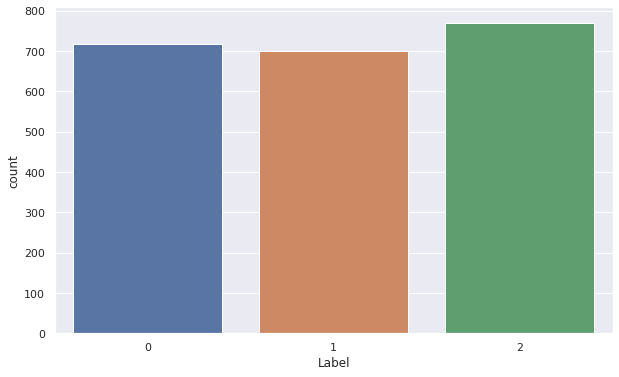

In [24]:
sns.countplot(data.Label)

In [25]:
data.Label.value_counts()

2    770
0    717
1    699
Name: Label, dtype: int64

# Text Preprocessing

*   Tokenize the words
*   Remove stopwords
*   stemming or lemmatization

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install git+https://github.com/sushil79g/Nepali_nlp.git

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sushil79g/Nepali_nlp.git to /tmp/pip-req-build-dgn_3wms
  Running command git clone -q https://github.com/sushil79g/Nepali_nlp.git /tmp/pip-req-build-dgn_3wms
     |████████████████████████████████| 24.2 MB 4.0 MB/s 
     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 89 kB 6.0 MB/s 
     |████████████████████████████████| 1.3 MB 47.1 MB/s 
     |████████████████████████████████| 125 kB 23.3 MB/s 
     |████████████████████████████████| 11.0 MB 42.2 MB/s 
     |████████████████████████████████| 5.5 MB 43.1 MB/s 
     |████████████████████████████████| 58 kB 2.8 MB/s 
     |████████████████████████████████| 1.5 MB 45.8 MB/s 
     |████████████████████████████████| 118 kB 43.2 MB/s 
     |████████████████████████████████| 123 kB 45.2 MB/s 
     |████████████████████████████████| 235 kB 45.4 MB/s 
     |████████████████

In [27]:
from Nepali_nlp import Tokenizer
from Nepali_nlp import Stem
text = "सरकारका प्रवक्ता प्रदीप ज्ञवालीले पनि गत बिहीबार उनलाई अनशन तोड्न आग्रह गरेका थिए"
Stem().rootify(text)

['सरकार',
 'प्रवक्ता',
 'प्रदीप',
 'ज्ञवाली',
 'पनि',
 'गत',
 'बिहीबार',
 'उन',
 'अनशन',
 'तोड्न',
 'आग्रह',
 'गर',
 '']

In [28]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [29]:
words_to_be_removed = ["स्पष्ट", "राम्रो", "ठीक"]

In [30]:
nepali_stopwords = stopwords.words('nepali')

In [31]:
len(nepali_stopwords)

255

In [32]:
nepali_stopwords = [word for word in nepali_stopwords if word not in words_to_be_removed]

In [33]:
len(nepali_stopwords)

252

In [34]:
text = ["आग्रह", "गरेका", "थिए"]
Stem().rootify(text)

['आग्रह', 'गर', '']

In [35]:
def text_preprocessing(text):
  # Tokenize the reviews
  text = Tokenizer().word_tokenize(text)
  # Remove the nepali stopwords
  text = [word for word in text if word not in nepali_stopwords]
  # Stemming the nepali words
  text = Stem().rootify(text)
  text = ' '.join(text)
  # Remove the leading and trailing spaces
  text = text.split()
  text = ' '.join(text)
  
  return text

In [36]:
data.isnull().sum()

Data     0
Label    0
dtype: int64

In [37]:
data.Data[100]

'सडक मा भन्दा पहिले नेताको दिमाख मा ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास हुन्थ्यो कि'

In [38]:
text_preprocessing(data.Data[100])

'सडक नेता दिमाख ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास हुन्'

In [39]:
X = data["Data"].apply(text_preprocessing)
y = data["Label"]

In [40]:
X[100]

'सडक नेता दिमाख ब्रुमर लगाएर सफा गरिदिए देश चाडै बिकास हुन्'

In [41]:
print(len(X))
print(len(y))

2186
2186


# Train, Validation and Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)

In [43]:
print(f"Train size =  {len(X_train)}")
print(f"Validation size =  {len(X_val)}")
print(f"Test size =  {len(X_test)}")

Train size =  1748
Validation size =  219
Test size =  219


In [44]:
print(len(y_train), len(y_val), len(y_test))

1748 219 219


In [45]:
type(X_train)

pandas.core.series.Series

In [46]:
X_train.iloc[0]

'अाखिर देश विकासकाे बाधक काे रह'

In [47]:
y_train.iloc[0]

2

# Text Vectorization

### Get the count of each unique words to find out the maximum number of words for our vocabulary

In [48]:
from collections import Counter
def count_words(text):
  """
  Count unique words
  """
  count = Counter()
  for sentence in text:
    for word in sentence.split():
      count[word] += 1
  return count

In [49]:
counter = count_words(X_train)
counter = dict(counter)

for i, count in enumerate(counter.items()):
  print(count)
  if i > 5:
    break

('अाखिर', 1)
('देश', 82)
('विकासकाे', 3)
('बाधक', 5)
('काे', 3)
('रह', 23)
('बल्ल', 7)


In [50]:
print(f"There are {len(counter)} unique words in the corpus")

There are 3275 unique words in the corpus


In [51]:
unique_words_count = 3179

### Get the statistics of length of sentences(no. of words in a sentence) to get the maximum padding length

In [52]:
def getLengthArray(text):
  length = []
  for sentence in text:
    length.append(len(sentence.split()))
  return length

In [53]:
length_arr = getLengthArray(X_train)
length_series = pd.Series(length_arr)
print(length_series.describe())

count    1748.000000
mean        5.164760
std         4.338731
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        64.000000
dtype: float64


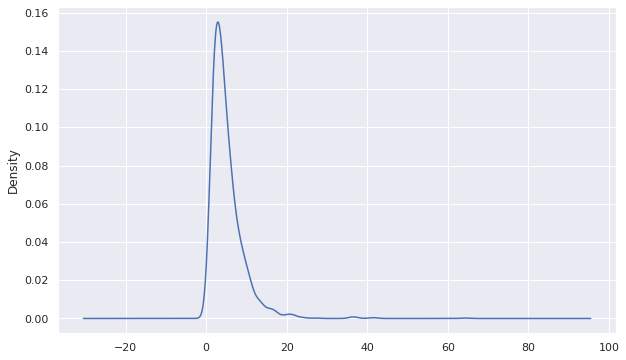

In [54]:
length_series.plot(kind = 'kde')

In [55]:
# From graph
maximum_padding_length = 10

### One Hot Encoding

In [56]:
# Tokenizer is used to give unique index value to each unique words (JUST LIKE IN ONE HOT ENCODING)
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = unique_words_count)
tokenizer.fit_on_texts(X_train)

In [57]:
word_index = tokenizer.word_index

for i, word in enumerate(word_index.items()):
  if i > 5:
    break
  print(word)

('देश', 1)
('राम्रो', 2)
('नेपाल', 3)
('काम', 4)
('लाग्', 5)
('गर्', 6)


In [58]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = maximum_padding_length, padding = 'post', truncating = 'post')
print(train_padded[0])

[1990, 1, 573, 291, 574, 21]
[1990    1  573  291  574   21    0    0    0    0]


In [59]:
val_sequences = tokenizer.texts_to_sequences(X_val)
print(val_sequences[0])
val_padded = pad_sequences(val_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
print(val_padded[0])

[809, 90, 221, 59]
[809  90 221  59   0   0   0   0   0   0]


In [60]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
print(test_padded[0])

[23, 588, 2455, 442, 810, 2456]
[  23  588 2455  442  810 2456    0    0    0    0]


In [61]:
print(X_train.iloc[0])
print(train_sequences[0])

अाखिर देश विकासकाे बाधक काे रह
[1990, 1, 573, 291, 574, 21]


In [62]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [63]:
def decode(text):
  return " ".join([reverse_word_index.get(i, "?") for i in  text])

In [64]:
decode(train_sequences[0])

'अाखिर देश विकासकाे बाधक काे रह'

In [65]:
print(f"Spape of train {train_padded.shape}")
print(f"Spape of validation {val_padded.shape}")
print(f"Spape of test {test_padded.shape}")

Spape of train (1748, 10)
Spape of validation (219, 10)
Spape of test (219, 10)


### Coding of Labels

In [66]:
y_train

2130    2
296     1
618     2
1625    1
1390    2
       ..
600     1
1600    0
1362    2
1548    1
864     0
Name: Label, Length: 1748, dtype: int64

In [67]:
y_train = pd.get_dummies(y_train).values

In [68]:
y_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [69]:
y_val = pd.get_dummies(y_val).values
y_test = pd.get_dummies(y_test).values

In [70]:
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_val : {y_val.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of y_train : (1748, 3)
Shape of y_val : (219, 3)
Shape of y_test : (219, 3)


# Model Development

In [124]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import regularizers

In [143]:
def getModel():
  model = Sequential([
    Embedding(unique_words_count, output_dim = 64, input_length = maximum_padding_length),
    LSTM(units = 10, dropout = 0.3, recurrent_dropout = 0.3, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Dense(20, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
  ])

  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  print(model.summary())

  return model

def getVisualization(history):
  # plot the training and validation loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # plot the training and validation accuracy at each epoch
  acc = history.history['accuracy'] 
  val_acc = history.history['val_accuracy']
  plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
  plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

In [144]:
model = getModel()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 10, 64)            203456    
                                                                 
 lstm_16 (LSTM)              (None, 10)                3000      
                                                                 
 dense_30 (Dense)            (None, 20)                220       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_31 (Dense)            (None, 3)                 63        
                                                                 
Total params: 206,739
Trainable params: 206,739
Non-trainable params: 0
_________________________________________________________________
None


In [145]:
history = model.fit(train_padded, y_train, epochs = 10, batch_size = 32, validation_data = (val_padded, y_val))

Epoch 1/10
55/55 [==============================] - 5s 25ms/step - loss: 1.1060 - accuracy: 0.3370 - val_loss: 1.1039 - val_accuracy: 0.3425
Epoch 2/10
55/55 [==============================] - 1s 17ms/step - loss: 1.1003 - accuracy: 0.3776 - val_loss: 1.1007 - val_accuracy: 0.3699
Epoch 3/10
55/55 [==============================] - 1s 16ms/step - loss: 1.0702 - accuracy: 0.4457 - val_loss: 1.0592 - val_accuracy: 0.4247
Epoch 4/10
55/55 [==============================] - 1s 17ms/step - loss: 0.8692 - accuracy: 0.5887 - val_loss: 1.0419 - val_accuracy: 0.4977
Epoch 5/10
55/55 [==============================] - 1s 18ms/step - loss: 0.7166 - accuracy: 0.6419 - val_loss: 1.1245 - val_accuracy: 0.6027
Epoch 6/10
55/55 [==============================] - 1s 16ms/step - loss: 0.6093 - accuracy: 0.7197 - val_loss: 1.1930 - val_accuracy: 0.6210
Epoch 7/10
55/55 [==============================] - 1s 17ms/step - loss: 0.4567 - accuracy: 0.8478 - val_loss: 1.3749 - val_accuracy: 0.6347
Epoch 8/10
55

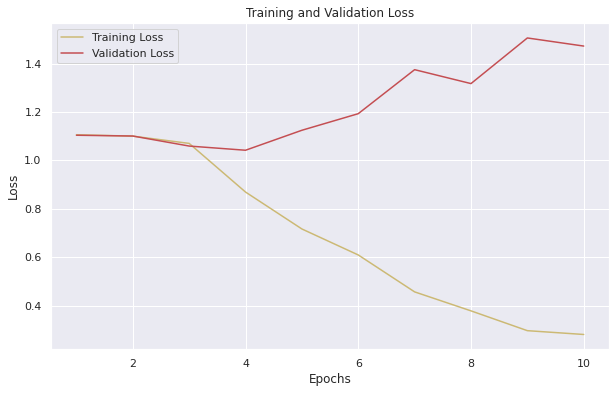

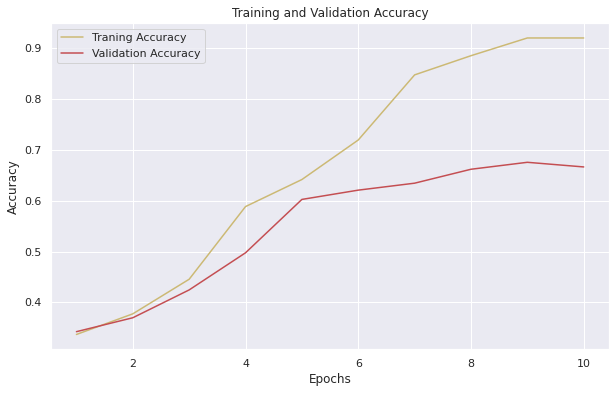

In [146]:
getVisualization(history)

# Test Data Evaluation

In [147]:
from sklearn.metrics import confusion_matrix, classification_report

In [148]:
def evalTestData(model, test_padded, y_test):
  y_pred = model.predict(test_padded)

  # y_pred = [[0.2, 0.7, 0.2], [0.5, 0.3, 0.2], ....]. This is the form of y_pred
  # y_pred_modified = [1, 0, ....]. This will be the form of y_pred_modified
  y_pred_modified = []
  for pred in y_pred:
    pred = list(pred)
    max_value = max(pred)
    max_index = pred.index(max_value)
    y_pred_modified.append(max_index)
  
  # Count plot of the y_pred_modified
  count_plot = sns.countplot(y_pred_modified)
  count_plot.set(xlabel = "Emotions Class", ylabel = "Frequency")
  count_plot.set_title("Frequency of predicted Emotion")
  plt.show()

  print()
  print()

  # y_test = [[0, 1, 0], [1, 0, 0], ....]. This is the form of y_pred
  # y_test_modified = [1, 0, ....]. This will be the form of y_pred_modified
  y_test_modified = []
  for arr in y_test:
    arr = list(arr)
    max_value = max(arr)
    max_index = arr.index(max_value)
    y_test_modified.append(max_index)
  
  # Confusion matrix for the test and predicted data
  cm = confusion_matrix(y_true = y_test_modified, y_pred = y_pred_modified)
  cm_heatmap = sns.heatmap(cm, annot = True)
  cm_heatmap.set(xlabel = "Predicted", ylabel = "True", title = "Confusion matrix for the model")
  plt.show()

  print()
  print()
  print("Classification report : ")
  print("=======================================================")
  print(classification_report(y_true = y_test_modified, y_pred = y_pred_modified, target_names = ['Negative', 'Positive', 'Neutral']))

7/7 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


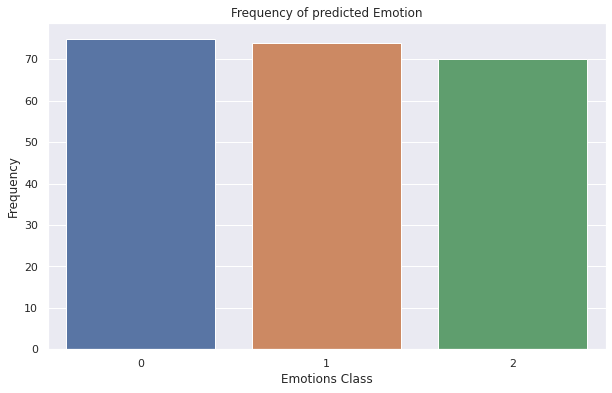

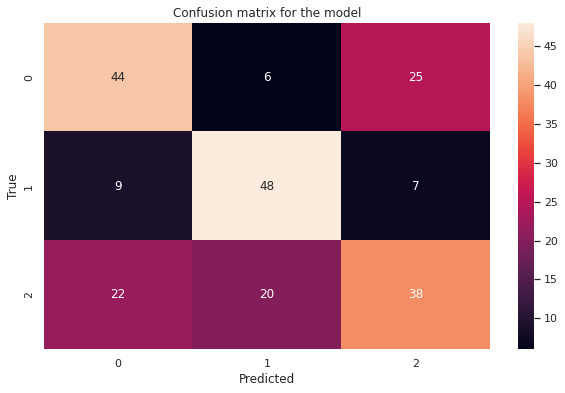



Classification report : 
              precision    recall  f1-score   support

    Negative       0.59      0.59      0.59        75
    Positive       0.65      0.75      0.70        64
     Neutral       0.54      0.47      0.51        80

    accuracy                           0.59       219
   macro avg       0.59      0.60      0.60       219
weighted avg       0.59      0.59      0.59       219



In [149]:
evalTestData(model, test_padded, y_test)

# Own Data Test and Evaluation

In [ ]:
!pip install nepali-unicode-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nepali_unicode_converter.convert import Converter

converter = Converter()
mystring = 'aahaa ! kati raamro. je hos gajaba ko rahexa'
own_string = converter.convert(mystring)
print(own_string)

आहा ! कति राम्रो। जे होस् गजब को रहेxअ


In [ ]:
def testOwnString(own_string):
  own_string_list = [own_string]
  own_string_series = pd.Series(own_string_list)
  # print(own_string_series)
  own_string_sequences = tokenizer.texts_to_sequences(own_string_series)
  # print(own_string_sequences)
  own_string_padded = pad_sequences(own_string_sequences, maxlen = maximum_padding_length, padding = "post", truncating = "post")
  # print(own_string_padded)
  own_pred = model.predict(own_string_padded)
  return own_pred


In [ ]:
testOwnString(own_string)

1/1 [==============================] - 0s 27ms/step


array([[0.00198605, 0.00278901, 0.99522495]], dtype=float32)